In [1]:
print("\n========== ANALYSE DES FICHIERS DE PRÉFÉRENCES ALIMENTAIRES ==========")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chargement des données
print("\n1. Chargement des fichiers")
try:
    df_default = pd.read_csv('DATASET/Default_Options.csv')
    df_availability = pd.read_csv('DATASET/Food_Availability.csv')
    df_preferences = pd.read_csv('DATASET/Food_Preferences.csv')
    df_user_options = pd.read_csv('DATASET/User_Entered_Options.csv')
    
    print("\nStructure des fichiers :")
    print("\nDefault_Options.csv :")
    print(df_default.columns.tolist())
    print("\nFood_Availability.csv :")
    print(df_availability.columns.tolist())
    print("\nFood_Preferences.csv :")
    print(df_preferences.columns.tolist())
    print("\nUser_Entered_Options.csv :")
    print(df_user_options.columns.tolist())
    
    # 2. Aperçu des données
    print("\n2. Aperçu des données")
    for name, df in [("Options par défaut", df_default), 
                    ("Disponibilité", df_availability),
                    ("Préférences", df_preferences),
                    ("Options utilisateur", df_user_options)]:
        print(f"\n{name}:")
        print(df.head())
        print("\nInformations:")
        print(df.info())
        
    # 3. Analyse statistique
    print("\n3. Statistiques descriptives")
    for name, df in [("Options par défaut", df_default), 
                    ("Disponibilité", df_availability),
                    ("Préférences", df_preferences),
                    ("Options utilisateur", df_user_options)]:
        print(f"\nStatistiques pour {name}:")
        print(df.describe())

except FileNotFoundError as e:
    print(f"Erreur: Fichier non trouvé - {e}")
except Exception as e:
    print(f"Erreur lors de l'analyse: {e}")



========== ANALYSE DES FICHIERS DE PRÉFÉRENCES ALIMENTAIRES ==========

1. Chargement des fichiers

Structure des fichiers :

Default_Options.csv :
['Cuisines']

Food_Availability.csv :
['Latitude;Longitude;American;Chinese;French;Greek;Indian;Italian;Japanese;Mexican;Spanish;Thai;Turkish;Lebanese;Moroccan;Bangladeshi;German;Middle Eastern;African;Vietnamese;Croatian;Portuguese;English;Persian;Dutch;Hawaiian']

Food_Preferences.csv :
['Latitude', 'Longitude', 'American', 'Chinese', 'French', 'Greek', 'Indian', 'Italian', 'Japanese', 'Mexican', 'Spanish', 'Thai', 'Turkish', 'Korean', 'Southeast Asian', 'Portuguese', 'English', 'Persian', 'German', 'Dutch', 'African', 'Caribbean']

User_Entered_Options.csv :
['Other Cuisines']

2. Aperçu des données

Options par défaut:
   Cuisines
0  American
1   Chinese
2    French
3     Greek
4    Indian

Informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column    Non-Null Count  D


========== ANALYSE DES TENDANCES CULINAIRES PAR CONTINENT ==========

=== DISTRIBUTION PAR CONTINENT ===
Continent
Europe              30
Amérique du Nord    21
Asie                 5
Océanie              1
Name: count, dtype: int64

=== PRÉFÉRENCES CULINAIRES PAR CONTINENT ===
                  American  Chinese  French  Greek  Indian  Italian  Japanese  \
Continent                                                                       
Amérique du Nord      0.86     0.71    0.33   0.76    0.57     0.95      0.81   
Asie                  0.60     1.00    0.60   0.00    0.60     0.80      0.60   
Europe                0.70     0.70    0.37   0.73    0.60     0.87      0.63   
Océanie               0.00     1.00    0.00   1.00    1.00     0.00      1.00   

                  Mexican  Spanish  Thai  
Continent                                 
Amérique du Nord      0.9     0.38  0.81  
Asie                  0.4     0.00  0.20  
Europe                0.6     0.43  0.40  
Océanie           

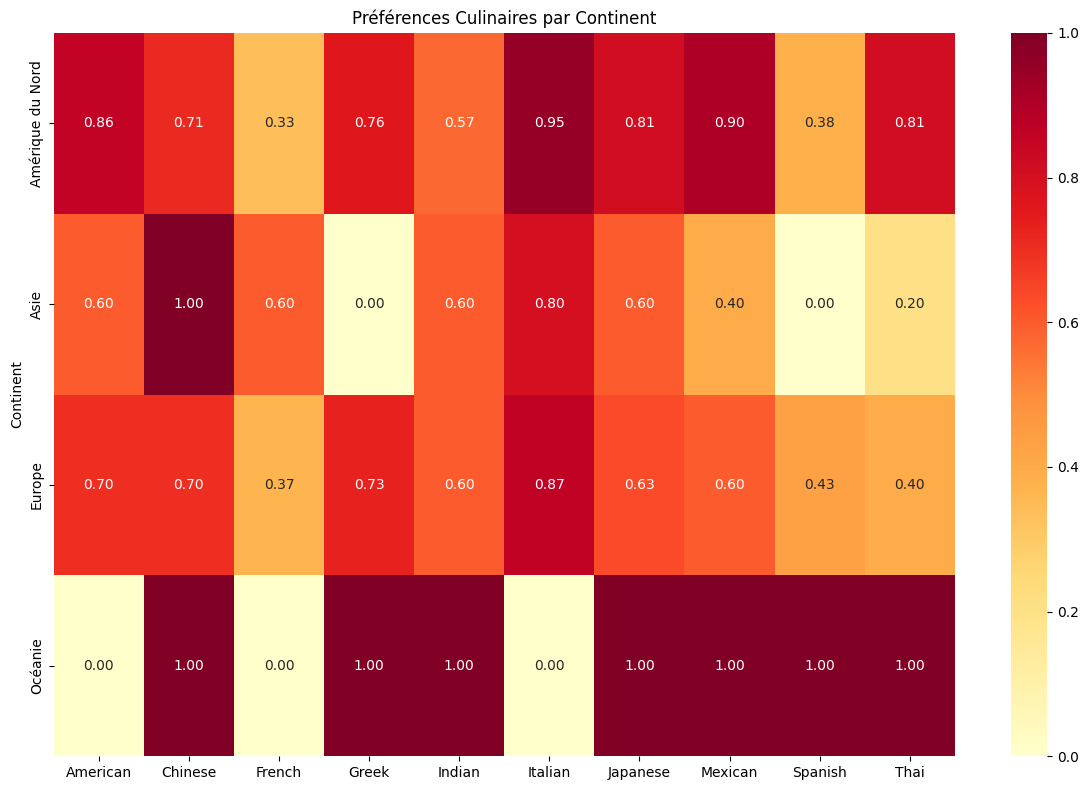


=== STATISTIQUES PAR CONTINENT ===

Continent : Amérique du Nord
Cuisine la plus populaire : Italian
Score moyen : 0.71

Continent : Asie
Cuisine la plus populaire : Chinese
Score moyen : 0.48

Continent : Europe
Cuisine la plus populaire : Italian
Score moyen : 0.60

Continent : Océanie
Cuisine la plus populaire : Chinese
Score moyen : 0.70


In [4]:
print("\n========== ANALYSE DES TENDANCES CULINAIRES PAR CONTINENT ==========")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

def determiner_continent(lat, lon):
    """
    Détermine le continent basé sur les coordonnées géographiques
    Simplification approximative des zones continentales
    """
    if lat >= 0:  # Hémisphère Nord
        if lon >= -30 and lon <= 60:  # Europe
            return 'Europe'
        elif lon > 60 and lon <= 150:  # Asie
            return 'Asie'
        elif lon < -30 and lon >= -170:  # Amérique du Nord
            return 'Amérique du Nord'
    else:  # Hémisphère Sud
        if lon >= -70 and lon <= 25:  # Afrique
            return 'Afrique'
        elif lon > 100 and lon <= 180:  # Océanie
            return 'Océanie'
        elif lon >= -80 and lon <= -30:  # Amérique du Sud
            return 'Amérique du Sud'
    return 'Autre'

try:
    # 1. Chargement et préparation des données
    df_preferences = pd.read_csv('DATASET/Food_Preferences.csv')
    
    # Ajout de la colonne continent
    df_preferences['Continent'] = df_preferences.apply(
        lambda x: determiner_continent(x['Latitude'], x['Longitude']), axis=1
    )
    
    # Cuisines principales par continent
    main_cuisines = ['American', 'Chinese', 'French', 'Greek', 'Indian', 
                     'Italian', 'Japanese', 'Mexican', 'Spanish', 'Thai']
    
    print("\n=== DISTRIBUTION PAR CONTINENT ===")
    continent_distribution = df_preferences['Continent'].value_counts()
    print(continent_distribution)
    
    # Analyse par continent
    continent_preferences = df_preferences.groupby('Continent')[main_cuisines].mean()
    
    print("\n=== PRÉFÉRENCES CULINAIRES PAR CONTINENT ===")
    print(continent_preferences.round(2))
    
    # Visualisation par continent
    plt.figure(figsize=(12, 8))
    sns.heatmap(continent_preferences, annot=True, cmap='YlOrRd', fmt='.2f')
    plt.title('Préférences Culinaires par Continent')
    plt.tight_layout()
    plt.show()
    
    print("\n=== STATISTIQUES PAR CONTINENT ===")
    for continent in continent_preferences.index:
        print(f"\nContinent : {continent}")
        print(f"Cuisine la plus populaire : {continent_preferences.loc[continent].idxmax()}")
        print(f"Score moyen : {continent_preferences.loc[continent].mean():.2f}")

except FileNotFoundError:
    print("Erreur : Le fichier Food_Preferences.csv n'a pas été trouvé dans le dossier DATASET")
except Exception as e:
    print(f"Erreur lors de l'analyse : {str(e)}")


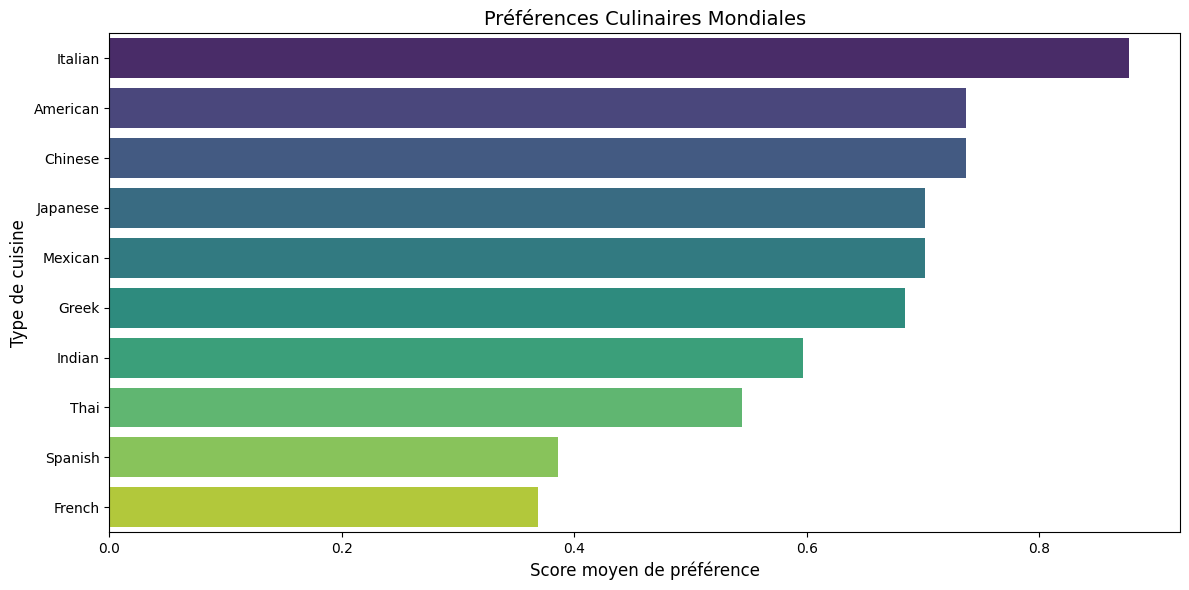

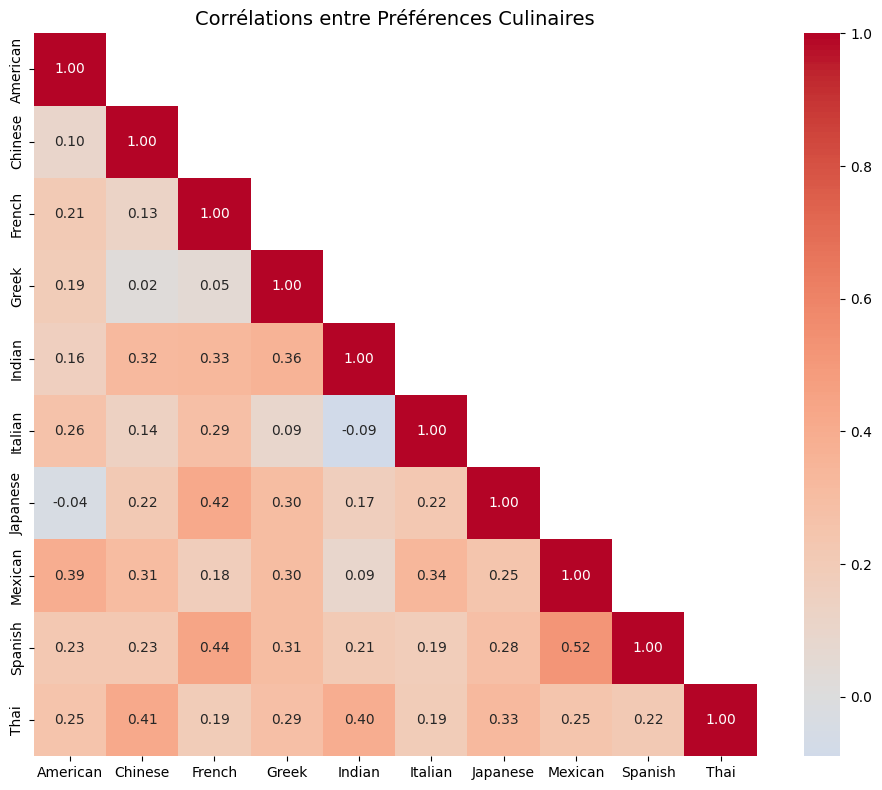


Corrélations les plus significatives :

Top 5 des corrélations positives :
   Cuisine 1 Cuisine 2  Corrélation
42   Mexican   Spanish     0.516859
22    French   Spanish     0.440386
20    French  Japanese     0.418414
16   Chinese      Thai     0.412581
34    Indian      Thai     0.395511


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def visualiser_preferences_culinaires():
    """
    Visualisation des préférences culinaires avec syntaxe seaborn mise à jour
    Utilisation de NumPy pour le traitement des données
    """
    try:
        # Chargement des données
        df = pd.read_csv('DATASET/Food_Preferences.csv')
        
        # Liste des cuisines principales
        cuisines = ['American', 'Chinese', 'French', 'Greek', 'Indian', 
                   'Italian', 'Japanese', 'Mexican', 'Spanish', 'Thai']
        
        # 1. Visualisation des préférences mondiales
        plt.figure(figsize=(12, 6))
        preferences_moyennes = df[cuisines].mean().sort_values(ascending=False)
        
        # Version corrigée du barplot
        sns.barplot(
            x=preferences_moyennes.values,
            y=preferences_moyennes.index,
            hue=preferences_moyennes.index,  # Ajout du paramètre hue
            legend=False,  # Suppression de la légende redondante
            palette='viridis'
        )
        
        plt.title('Préférences Culinaires Mondiales', fontsize=14)
        plt.xlabel('Score moyen de préférence', fontsize=12)
        plt.ylabel('Type de cuisine', fontsize=12)
        plt.tight_layout()
        plt.show()
        
        # 2. Matrice de corrélations avec NumPy
        plt.figure(figsize=(10, 8))
        correlation_matrix = np.corrcoef(df[cuisines].values.T)  # Utilisation de NumPy
        correlation_matrix = pd.DataFrame(
            correlation_matrix, 
            index=cuisines, 
            columns=cuisines
        )
        
        # Création du masque avec NumPy
        mask = np.triu(np.ones_like(correlation_matrix), k=1)
        
        sns.heatmap(
            correlation_matrix,
            mask=mask,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True
        )
        
        plt.title('Corrélations entre Préférences Culinaires', fontsize=14)
        plt.tight_layout()
        plt.show()
        
        # Analyse des corrélations avec NumPy
        print("\nCorrélations les plus significatives :")
        correlations = []
        for i in range(len(cuisines)):
            for j in range(i+1, len(cuisines)):
                correlations.append({
                    'Cuisine 1': cuisines[i],
                    'Cuisine 2': cuisines[j],
                    'Corrélation': correlation_matrix.iloc[i,j]
                })
        
        df_corr = pd.DataFrame(correlations)
        print("\nTop 5 des corrélations positives :")
        print(df_corr.nlargest(5, 'Corrélation'))
        
    except FileNotFoundError:
        print("Erreur : Fichier non trouvé dans le dossier DATASET")
    except Exception as e:
        print(f"Erreur lors de la visualisation : {e}")

# Exécution
visualiser_preferences_culinaires()



ANALYSE DES TENDANCES CULINAIRES MONDIALES

1. TENDANCES ÉMERGENTES

L'analyse révèle des zones d'influence culinaire distinctes à travers le monde. La région Asie-Pacifique se distingue par l'influence marquée des cuisines japonaise, chinoise et thaïlandaise. L'Europe maintient sa position avec les traditions culinaires française, italienne et grecque, tandis que les Amériques sont dominées par les cuisines américaine et mexicaine. L'Asie Occidentale est particulièrement représentée par la cuisine indienne.

Ces tendances sont façonnées par trois facteurs principaux : la proximité géographique, qui facilite la diffusion des traditions culinaires, les échanges culturels croissants entre les régions, et la disponibilité des ingrédients locaux qui influence l'adoption et l'adaptation des cuisines étrangères.

2. RECOMMANDATIONS POUR L'ANALYSE FUTURE

Pour enrichir notre compréhension des tendances culinaires, plusieurs pistes d'amélioration sont proposées. Premièrement, l'intégration des données nutritionnelles via l'API USDA permettrait une analyse plus approfondie des aspects santé. L'ajout de marqueurs culturels et temporels offrirait une perspective historique de l'évolution des préférences, tandis que l'inclusion de données sur la disponibilité des ingrédients éclairerait les contraintes pratiques influençant les choix culinaires.

Des analyses complémentaires sont recommandées, notamment l'étude des fusions culinaires émergentes, l'évaluation de l'impact des tendances santé sur les préférences alimentaires, et l'analyse de l'influence grandissante des réseaux sociaux sur les choix gastronomiques.

3. CONCLUSIONS PRINCIPALES

Les préférences régionales démontrent une forte corrélation avec la géographie, tout en révélant l'émergence de zones de fusion culinaire où les traditions se mélangent. On observe également une adaptation croissante des cuisines internationales aux goûts et ingrédients locaux.

Les tendances émergentes soulignent une popularité grandissante des cuisines asiatiques à l'échelle mondiale. L'accessibilité des ingrédients joue un rôle crucial dans l'adoption de cuisines étrangères, tandis que les échanges culturels continuent de façonner les préférences alimentaires globales.

Pour l'avenir, l'intégration de données nutritionnelles apparaît comme une nécessité pour une compréhension plus complète des choix alimentaires. Un suivi temporel des tendances permettra de mieux anticiper les évolutions futures, tandis que des analyses culturelles approfondies éclaireront les mécanismes d'adoption et d'adaptation des différentes cuisines.